<a href="https://colab.research.google.com/github/mujahidrj/Artificial-Intelligence/blob/master/HW2/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2

Extend the code for mini-batch gradient descent in the notebook linear_regression_simple_numpy_implementation.ipynb to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
np.random.seed(42)

In [0]:
m = 75
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

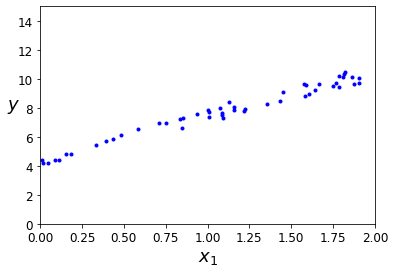

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
X_b = np.column_stack([np.ones((m, 1)), X])

In [0]:
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

In [0]:
#numEpochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
initial_weight = np.random.randn(2, 1) 

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 2

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [9]:
weight_path_mgd[-1]

array([[3.97467832],
       [3.38428541]])

In [0]:
weight_path_mgd = np.array(weight_path_mgd)

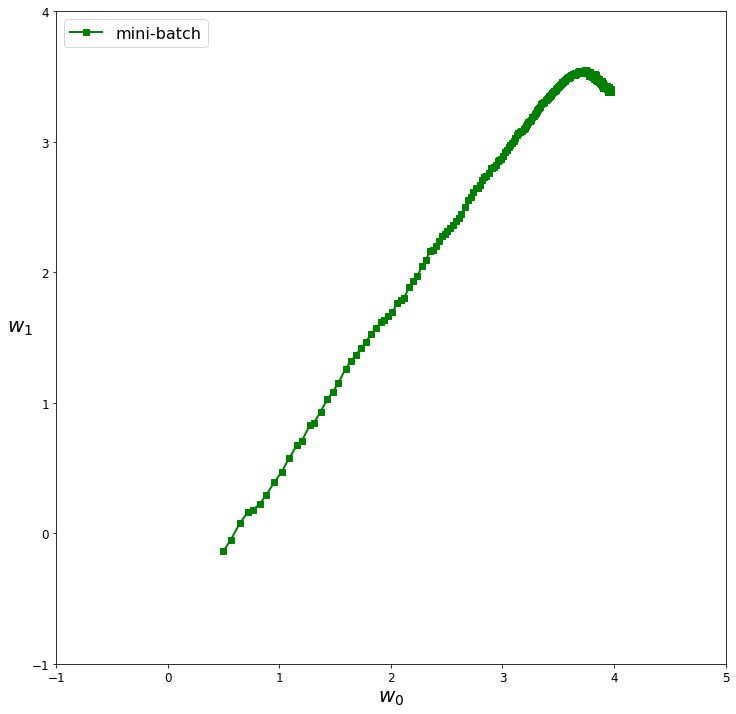

In [11]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

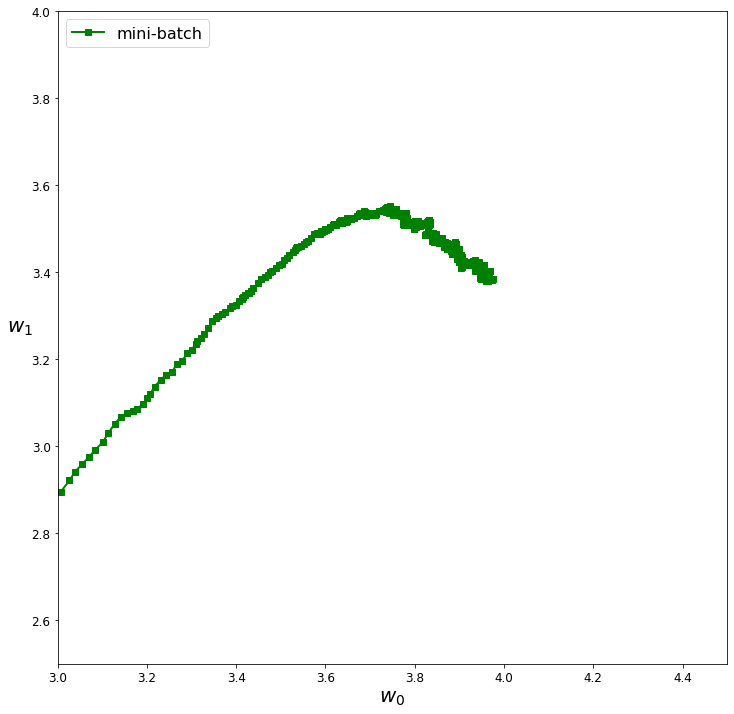

In [13]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([3, 4.5, 2.5, 4])
plt.show()